# Rotation of a cylinder with three perpendicular unit vectors defining a new base

Given a a point $p=(x, y, z)$ inside a cylinder and three unit vectors that define a rotated cylinder $v_1, v_2, v_3$ here we see how rotation is applied. <br>
The unit vectors $v_1, v_2$ define the new circular base of the cylinder and $v_3$ the new cylinder axis. <br>
The rotation is made by applying the matrix multiplication:
$$
\left(\begin{array}{cc} 
{v_1}_x &{v_1}_y &{v_1}_z \\
{v_2}_x &{v_2}_y &{v_2}_z \\
{v_3}_x &{v_3}_y &{v_3}_z 
\end{array}\right)
\left(\begin{array}{cc} 
x\\ 
y \\
z
\end{array}\right)
$$ 

The meaning of this operation is the following: being the scalar product $vp$ the projection of $p$ on v, then the matrix multiplication above is the projection of $p$ onto the triplet $v_1, v_2 $ and $v_3$

In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def sample_cyl_coord(R, HEIGTH, n_points=1000):
    r = [ R*random.random() for i in range(n_points) ]
    theta = [ 2*math.pi* random.random() for i in range(n_points) ]
    zeta = [ HEIGTH*random.random() for i in range(n_points) ]
    return r, theta, zeta

def to_cartesian(r, theta):
    x1 = [ r[i]*math.cos(theta[i]) for i in  range(0, len(r))]
    x2 = [ r[i]*math.sin(theta[i]) for i in  range(0, len(r))]
    return x1, x2


class Transf_coord:
    def __init__(self, v1, v3):
        self.v1 = v1
        self.v2 = np.cross(v1, v3)
        self.v3 = v3

    def get_transform(self, x, y, z):
        x_, y_, z_ = [], [], []
        for i in range(0,len(x)):
            p = self.transform([x[i], y[i], z[i]])
            x_.append(p[0])
            y_.append(p[1])
            z_.append(p[2])
        return x_, y_, z_

    def transform(self, point):
        x1 = np.dot(point, self.v1)
        x2 = np.dot(point, self.v2)
        x3 = np.dot(point, self.v3)
        return [x1, x2, x3]



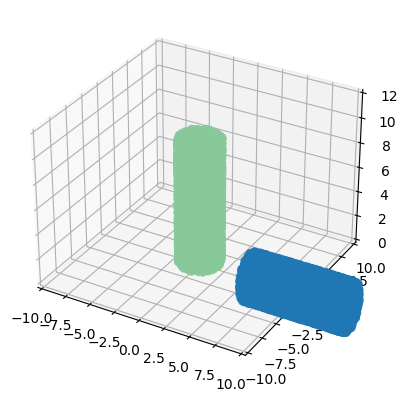

In [6]:
r, theta, z = sample_cyl_coord(2, 10, n_points=100_000)
x, y = to_cartesian(r, theta)

v1 = [0, 0, 1]
v3 = [0, 1, 0]

TR = Transf_coord(v1, v3)

x_, y_, z_ = TR.get_transform(x,y,z)
x_ = [i+5 for i in x_]


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, color = '#88c999')
ax.scatter(x_, y_, z_)

ax.set_xlim3d(-10,10)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(0, 12)


plt.show()